### HW1: Investigation on Homoclinic Tangle
For full write-up, refer to [notion page](https://frequent-hell-f1d.notion.site/Applied-Dynamical-System-Homework-1-91e54b3e48d24d858db5a592d7586cf2)

**Set-up: 2D discrete flow governed by**
$$\begin{align}
x_{n+1}&=x_n+y_n+kx_n(x_n-1)\\
y_{n+1}&=y_n+kx_n(x_n-1)
\end{align}$$
It has fixed point $$(x^*,y^*)=(1,0)$$

The linearized stable manifold around $(x^*,y^*)=(1,0)$ corresponds to eigenvector 
$$\psi_1=\begin{pmatrix} 
1 \\
\frac{-k+\sqrt{k^2+4k}}{2}
\end{pmatrix}$$



The linearized unstable manifold corresponds to eigenvector 
$$\psi_1=\begin{pmatrix} 
1 \\
\frac{-k-\sqrt{k^2+4k}}{2}
\end{pmatrix}$$

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

### Visualize the unstable manifold

In [109]:
x_fixed, y_fixed = 1,0

In [253]:
# number of iterations
n_itr = 30
# number of points to sample
n_points = 2000
# evolve vectors in time
v_array = np.empty((n_itr,2,n_points))
v_array_inverse = np.empty((n_itr,2,n_points))

# initialize 100 points in a short linear segment along the unstable manifold
k = 1.5
dx = np.linspace(-0.0001,0.0001,n_points+1)[1:]
dy = (-k+np.sqrt(k*(k+4)))/2 * dx
dy_inverse = (-k-np.sqrt(k*(k+4)))/2 * dx
x = x_fixed + dx
y = y_fixed + dy
y_inverse = y_fixed + dy_inverse
v_0 = np.stack([x,y])
v_0_inverse = np.stack([x,y_inverse])
v_array[0] = v_0
v_array_inverse[0] = v_0_inverse
print(v_array.shape)

(30, 2, 2000)


In [254]:
# iterate the discrete flow backward and forward
def discrete_map(v,k=k):
    """
    input: 
        k: constant of nonlinearity in the governing equations
        v: current position vector v = (2,n_points)
    output:
        v_next: next position vector v_next = (x_next, y_next)
    """
    x = v[0]
    y = v[1]
    y_next = y + k * x * (x-1)
    x_next = x + y_next
    v_next = np.stack([x_next, y_next])
    return v_next

def discrete_map_inverse(v,k=k):
    """
    input: 
        k: constant of nonlinearity in the governing equations
        v: current position vector v = (2,n_points)
    output:
        v_next: next position vector v_next = (x_next, y_next)
    """
    x = v[0]
    y = v[1]
    x_next = x - y
    y_next = y - k * x_next * (x_next-1)
    v_next = np.stack([x_next, y_next])
    return v_next

for i in range(0,n_itr-1):
    # print(i)
    v_array[i+1] = discrete_map(v_array[i])
    v_array_inverse[i+1] = discrete_map_inverse(v_array_inverse[i])
    
    

/var/folders/n5/brcgl0416bxgynp82dl3r0s00000gn/T/ipykernel_14685/1418356109.py:28: RuntimeWarning: overflow encountered in multiply
  y_next = y - k * x_next * (x_next-1)
/var/folders/n5/brcgl0416bxgynp82dl3r0s00000gn/T/ipykernel_14685/1418356109.py:12: RuntimeWarning: overflow encountered in multiply
  y_next = y + k * x * (x-1)


### Arrowsmith and Place (1990) 3.7.3

In [231]:
def iteration_plotter(itr):
    plt.figure(figsize = (6,6), dpi = 200)
    plt.scatter(*v_array[itr], s=0.5, c = "b", label = "forward evolution of unstable manifold")
    plt.scatter(*v_array_inverse[itr], s=0.5, c = "r", label = "backward evolution of stable manifold")
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.legend()
    plt.title(f"iteration {itr}")
    
interact(iteration_plotter, itr = (0,n_itr-1,1))

interactive(children=(IntSlider(value=14, description='itr', max=29), Output()), _dom_classes=('widget-interac…

<function __main__.iteration_plotter(itr)>

### Arrowsmith and Place (1990) 3.7.4

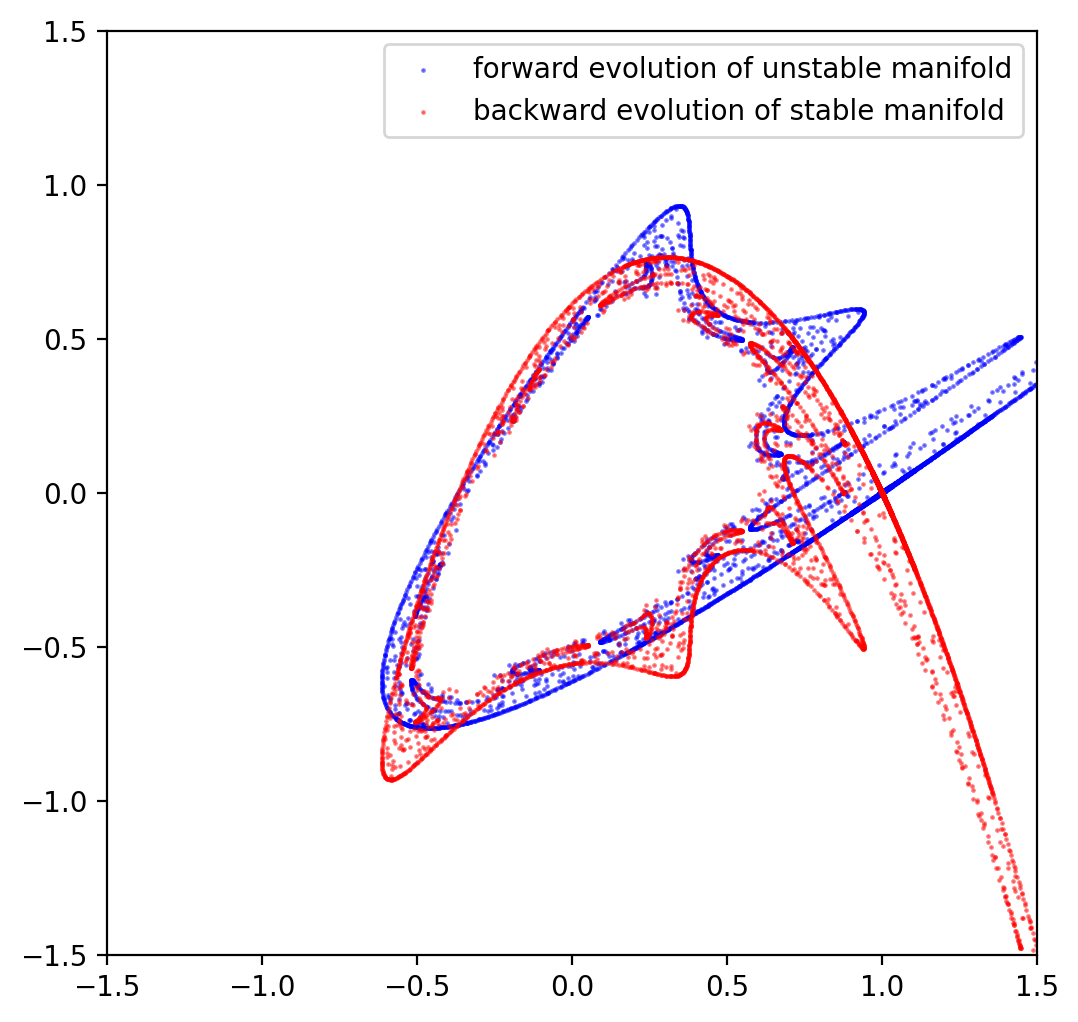

In [232]:
plt.figure(figsize = (6,6), dpi = 200)
plt.scatter(*np.swapaxes(v_array,0,1).reshape(2,-1).reshape([2,-1]), s=0.5, c = "b", alpha = 0.5, label = "forward evolution of unstable manifold")
plt.scatter(*np.swapaxes(v_array_inverse,0,1).reshape(2,-1).reshape([2,-1]), s=0.5, c = "r", alpha = 0.5, label = "backward evolution of stable manifold")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend()


In [250]:
### repeat 3.7.3 for each value of k
k_list = np.linspace(0.2,2.0,101)
v_array_list = []
v_array_inverse_list = []
for k in k_list:
    dx = np.linspace(-0.0001,0.0001,n_points+1)[1:]
    dy = (-k+np.sqrt(k*(k+4)))/2 * dx
    dy_inverse = (-k-np.sqrt(k*(k+4)))/2 * dx
    x = x_fixed + dx
    y = y_fixed + dy
    y_inverse = y_fixed + dy_inverse
    v_0 = np.stack([x,y])
    v_0_inverse = np.stack([x,y_inverse])
    v_array[0] = v_0
    v_array_inverse[0] = v_0_inverse
    for i in range(0,n_itr-1):
        # print(i)
        v_array[i+1] = discrete_map(v_array[i],k)
        v_array_inverse[i+1] = discrete_map_inverse(v_array_inverse[i],k)
    v_array_list += [np.copy(v_array)]
    v_array_inverse_list += [np.copy(v_array_inverse)]


/var/folders/n5/brcgl0416bxgynp82dl3r0s00000gn/T/ipykernel_14685/1418356109.py:28: RuntimeWarning: overflow encountered in multiply
  y_next = y - k * x_next * (x_next-1)
/var/folders/n5/brcgl0416bxgynp82dl3r0s00000gn/T/ipykernel_14685/1418356109.py:12: RuntimeWarning: overflow encountered in multiply
  y_next = y + k * x * (x-1)


In [252]:
def k_plotter(k_idx):
    plt.figure(figsize = (6,6), dpi = 200)
    plt.scatter(*np.swapaxes(v_array_list[k_idx],0,1).reshape(2,-1).reshape([2,-1]), s=0.5, c = "b", alpha = 0.5, label = "unstable manifold")
    plt.scatter(*np.swapaxes(v_array_inverse_list[k_idx],0,1).reshape(2,-1).reshape([2,-1]), s=0.5, c = "r", alpha = 0.5, label = "stable manifold")
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.title(f"k={k_list[k_idx]:.3f}")
    plt.legend()
    
interact(k_plotter, k_idx = (0,100-1,1))    

interactive(children=(IntSlider(value=49, description='k_idx', max=99), Output()), _dom_classes=('widget-inter…

<function __main__.k_plotter(k_idx)>